# Логистическая регрессия



In [43]:
!pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [44]:
data = pd.read_csv('diabetes.csv')
data = data.dropna()
print(data.shape)
print(list(data.columns))


(768, 9)
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [45]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


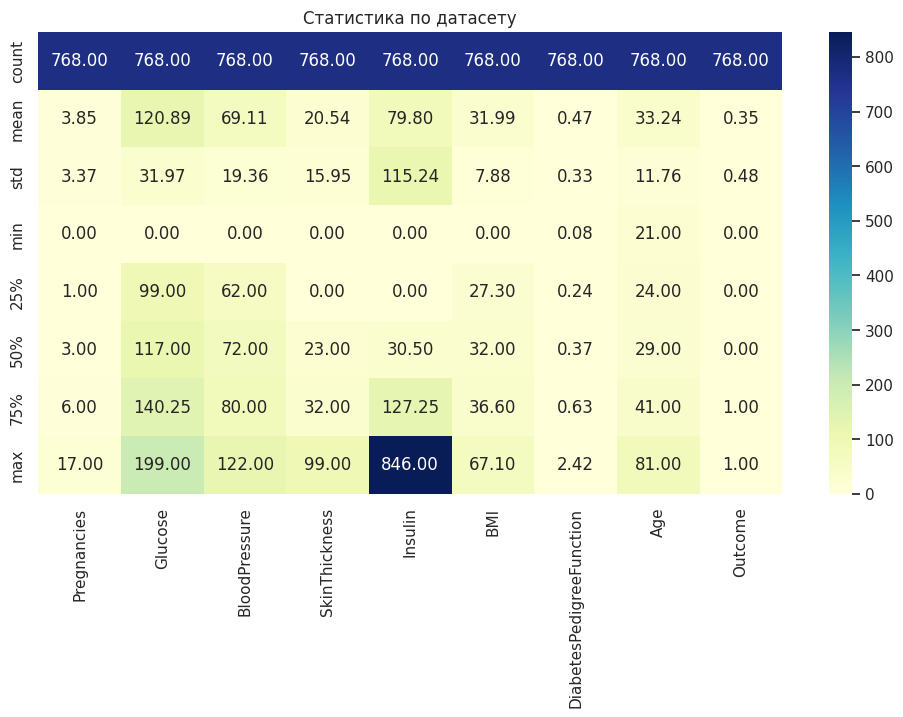

In [46]:
plt.figure(figsize=(12, 6))
sns.heatmap(statistics, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Статистика по датасету")
plt.show()

In [47]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

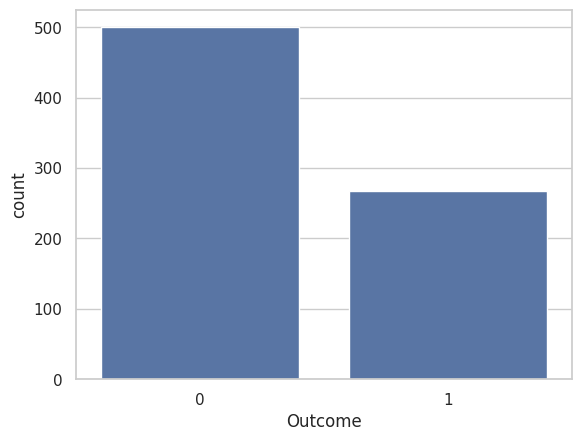

In [48]:
sns.countplot(x='Outcome', data=data)
plt.show()


In [49]:
count_no_sub = len(data[data['Outcome']==0])
count_sub = len(data[data['Outcome']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("без диабета процент", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("с диабетом процент", pct_of_sub*100)

без диабета процент 65.10416666666666
с диабетом процент 34.89583333333333


Классы наших данных не сбалансированы, а соотношение клиентов без диабета и с диабетом составляет 65 к 35. До балансировки классов проведём ещё несколько исследований:

In [50]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


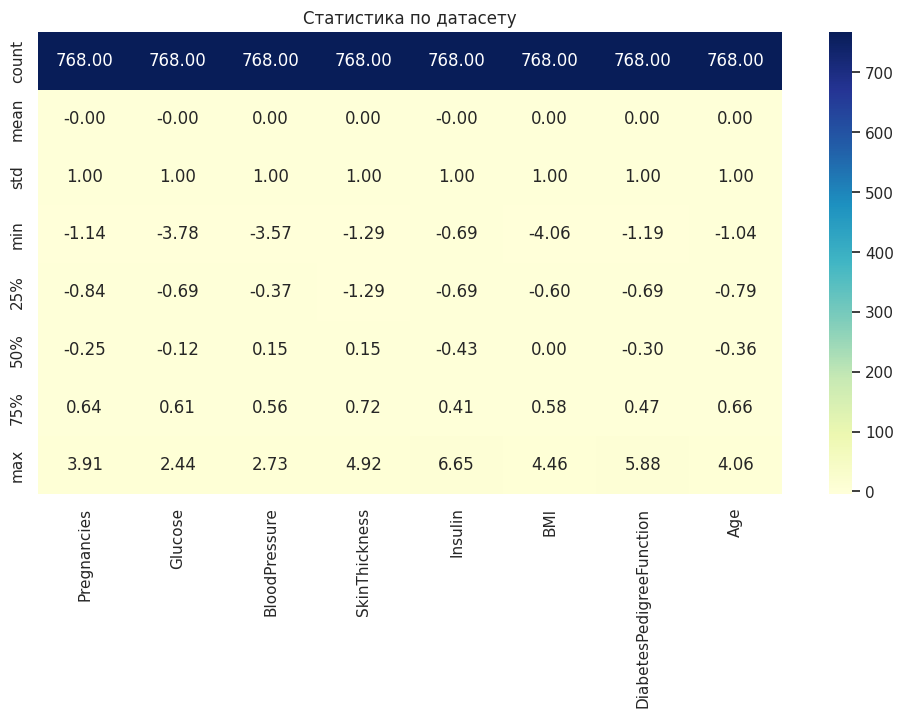

In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


X = data.drop('Outcome', axis=1)
y = data['Outcome']

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

normalized_statistics = X_normalized.describe()

plt.figure(figsize=(12, 6))
sns.heatmap(normalized_statistics, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Статистика по датасету")
plt.show()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (614, 8)
Размер тестовой выборки: (154, 8)


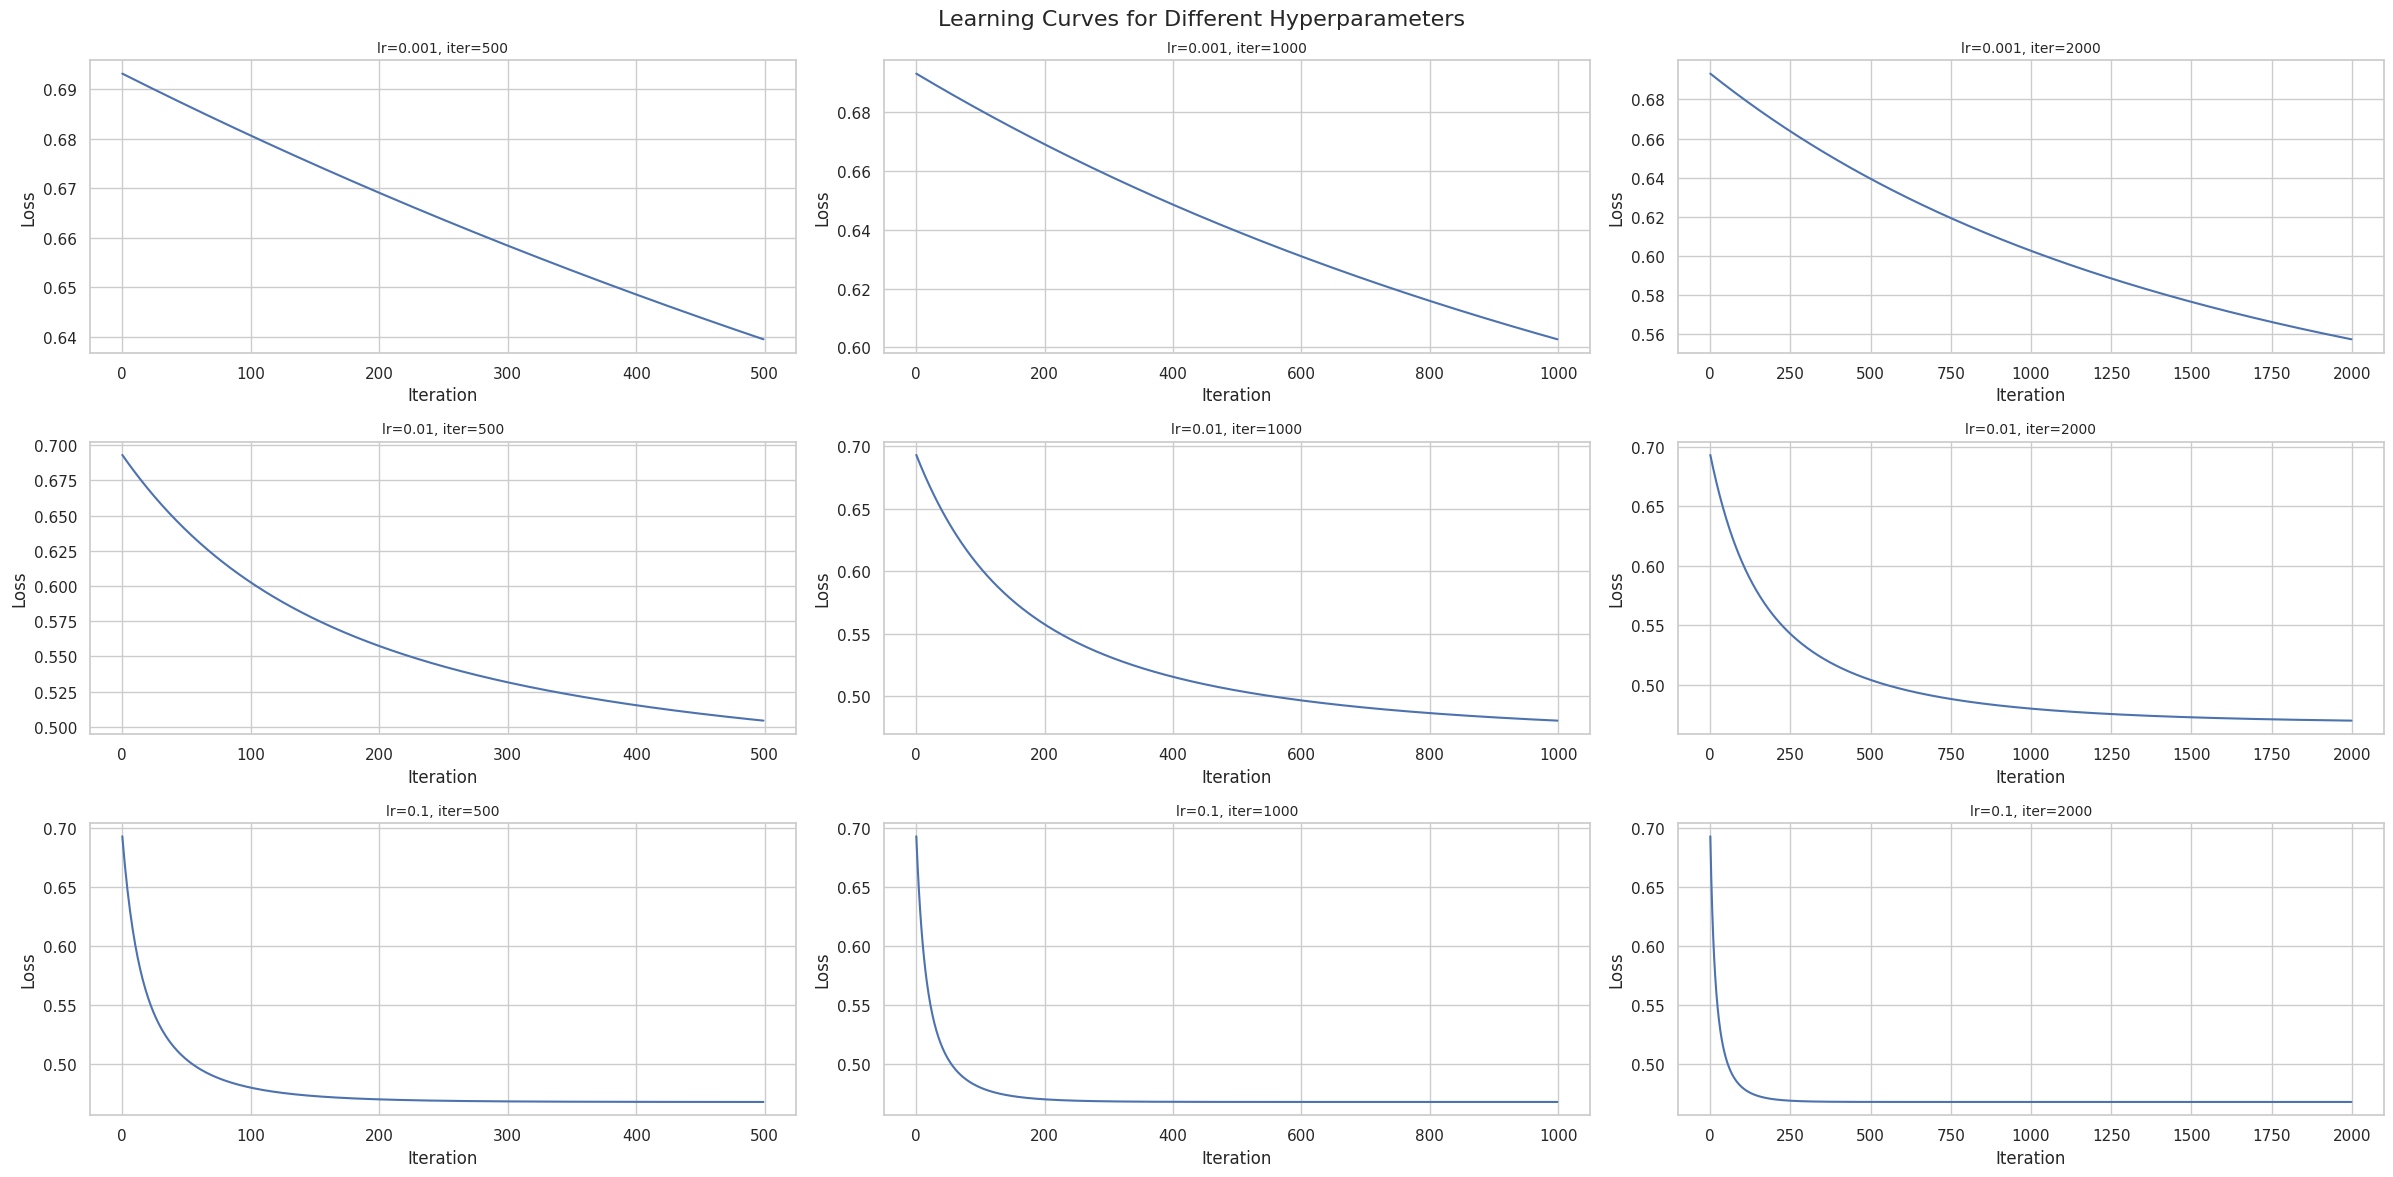


Hyperparameter tuning results:
           optimizer  learning_rate  iterations  accuracy  precision  \
0   gradient_descent          0.001         500  0.707792   0.583333   
1   gradient_descent          0.001        1000  0.707792   0.583333   
2   gradient_descent          0.001        2000  0.714286   0.590164   
3   gradient_descent          0.010         500  0.727273   0.614035   
4   gradient_descent          0.010        1000  0.733766   0.625000   
5   gradient_descent          0.010        2000  0.753247   0.654545   
6   gradient_descent          0.100         500  0.753247   0.649123   
7   gradient_descent          0.100        1000  0.753247   0.649123   
8   gradient_descent          0.100        2000  0.753247   0.649123   
9             newton          0.001         500  0.688312   0.545455   
10            newton          0.001        1000  0.688312   0.545455   
11            newton          0.001        2000  0.688312   0.545455   
12            newton          0.

In [93]:
class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000, optimizer='gradient_descent'):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.optimizer = optimizer
        self.weights = None # Влияние каждого признака на итоговое предсказание
        self.bias = None # Параметр смещения границы принятия решения
        self.loss_history = []
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        if self.optimizer == 'gradient_descent':
            self._gradient_descent(X, y, n_samples)
        elif self.optimizer == 'newton':
            self._newton_method(X, y, n_samples)
    
    def _gradient_descent(self, X, y, n_samples):
        for _ in range(self.n_iterations):
            # Вычисляем линейную комбинацию признаков и весов: z = wx + b
            linear_pred = np.dot(X, self.weights) + self.bias
            # Применяем сигмоидную функцию для получения вероятности: sigma(z) = 1/(1 + e^(-z))
            predictions = self.sigmoid(linear_pred)
            
            current_loss = self.log_loss(y, predictions)
            self.loss_history.append(current_loss)
            
            # Используем свойство сигмоиды для вычисления градиента: pwd{L}{w} = - x(y - sigma(z))
            gradient = -np.dot(X.T, (y - predictions))
            
            
            self.weights = self.weights - self.learning_rate * gradient / n_samples
            # Градиент по смещению должен показать нам, насколько нужно сместить границу принятия решения, чтобы уменьшить ошибку предсказания
            db = -np.sum(y - predictions) 
            self.bias = self.bias - self.learning_rate * db / n_samples
    
    def _newton_method(self, X, y, n_samples):
        for _ in range(self.n_iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_pred)
            
            # Вычисляем градиент (первая производная)
            gradient = -np.dot(X.T, (y - predictions))
            
            # Вычисляем матрицу Гессе (вторые производные) 
            # sigma(x)(1-sigma(x))
            diagonal = predictions * (1 - predictions)
            # H = X^T * diag(p * (1-p)) * X
            hessian = np.dot(X.T * diagonal, X)
            
            # Обновляем веса используя метод Ньютона
            update = np.linalg.solve(hessian, gradient)
            self.weights = self.weights - update

    # Функция потерь -y*log(h) - (1-y)*log(1-h)
    def log_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def predict_proba(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_pred)
    
    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)
    

def evaluate_model(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    precision = np.sum((y_true == 1) & (y_pred == 1)) / np.sum(y_pred == 1)
    recall = np.sum((y_true == 1) & (y_pred == 1)) / np.sum(y_true == 1)
    f1 = 2 * (precision * recall) / (precision + recall)
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

learning_rates = [0.001, 0.01, 0.1]
iterations = [500, 1000, 2000]
optimizers = ['gradient_descent', 'newton']
results = []

n_optimizers = len(optimizers) 
n_learning_rates = len(learning_rates)  
n_iterations = len(iterations) 


fig, axes = plt.subplots(3, 3, figsize=(24, 12))
fig.suptitle('Learning Curves for Different Hyperparameters', fontsize=16)
axes_flat = axes.flatten()
plot_idx = 0
for optimizer in optimizers:
    for lr in learning_rates:
        for n_iter in iterations:
            model = LogisticRegressionFromScratch(
                learning_rate=lr, 
                n_iterations=n_iter,
                optimizer=optimizer
            )
            model.fit(X_train, y_train)
            
            if optimizer == 'gradient_descent':
                ax = axes_flat[plot_idx]
                ax.plot(model.loss_history)
            
                y_pred = model.predict(X_test)
                metrics = evaluate_model(y_test, y_pred)
                
                results.append({
                    'optimizer': optimizer,
                    'learning_rate': lr,
                    'iterations': n_iter,
                    **metrics
                })
                
                ax.set_title(f'lr={lr}, iter={n_iter}', fontsize=10)
                ax.set_xlabel('Iteration')
                ax.set_ylabel('Loss')
                ax.grid(True)

            elif optimizer == 'newton':            
                y_pred = model.predict(X_test)
                metrics = evaluate_model(y_test, y_pred)
                
                results.append({
                    'optimizer': optimizer,
                    'learning_rate': lr,
                    'iterations': n_iter,
                    **metrics
                })
                
            
            plot_idx += 1

plt.tight_layout()
plt.show()

results_df = pd.DataFrame(results)
print("\nHyperparameter tuning results:")
print(results_df)


In [88]:
best_result = results_df.loc[results_df['f1'].idxmax()]
print("\nBest model parameters:")
print(f"Optimizer: {best_result['optimizer']}")
print(f"Learning rate: {best_result['learning_rate']}")
print(f"Iterations: {best_result['iterations']}")
print(f"F1 Score: {best_result['f1']:.4f}")



Best model parameters:
Optimizer: gradient_descent
Learning rate: 0.1
Iterations: 500
F1 Score: 0.6607
